# Linear regreseión, Regresión logistica y K-means 
#*@Autor:Jairo Eduardo Garcia Sisa
#*@Date:18/03/2022
#*@Description:
###Exersice for regression logistics y k-means the Caterpillar with help the Yahoo finanzas

#MERCADEO DE VALORES PARA CATERPILLAR

##Regresión Lineal

###Importando librerías

In [71]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

#from wikitables import import_tables    # para descargar tablas de Wikipedia
from sklearn.decomposition import PCA   # Análisis de componentes principales (PCA).


#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

###importando dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JairoGarcia16/Deep_Learning/main/Primer_Corte/CAT.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-18,234.000000,237.779999,229.740005,230.679993,226.064941,4336200
1,2021-03-19,228.750000,229.649994,224.050003,225.289993,220.782776,7485100
2,2021-03-22,226.619995,227.179993,223.570007,226.020004,221.498154,2211600
3,2021-03-23,222.059998,225.240005,216.649994,218.250000,213.883621,4017600
4,2021-03-24,220.509995,227.110001,220.509995,221.229996,216.804001,4258000


### conociendo y Preprocesando los datos


In [7]:
#df.describe()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

###Normalización de los datos.

---
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo. En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].


###Eliminando columnas que no necesitaremos (por ahora)

---
extraemos la columna DATE (fecha) que no usaremos en el algoritmo k-means. Antes de extraerla la guardaremos en la variable dates, ya que volveremos a insertarla en nuestro dataframe tras aplicar el algoritmo


In [8]:
df = df.dropna()
df = df.reset_index(drop=True)

In [9]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Date'] # Guardamos la columna Date.
df = df.drop('Date', 1) # Borramos la columna del dataframe.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


###Normalización de los datos.

---
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo. En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].


In [10]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [11]:
df_escalado.head()
df_escalado.isnull().sum()

Close     0
Volume    0
2         0
3         0
4         0
5         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


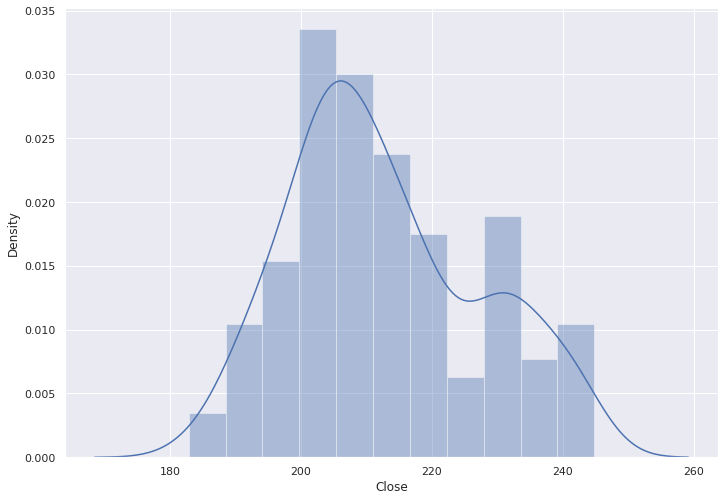

In [26]:
sb.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sb.distplot(df['Close'])                #agregamos los datos
plt.show()    

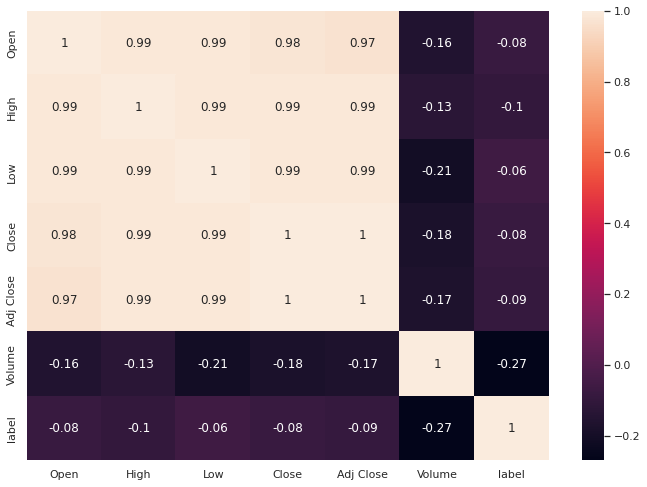

In [28]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = df.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sb.heatmap(data=correlation_matrix, annot=True)

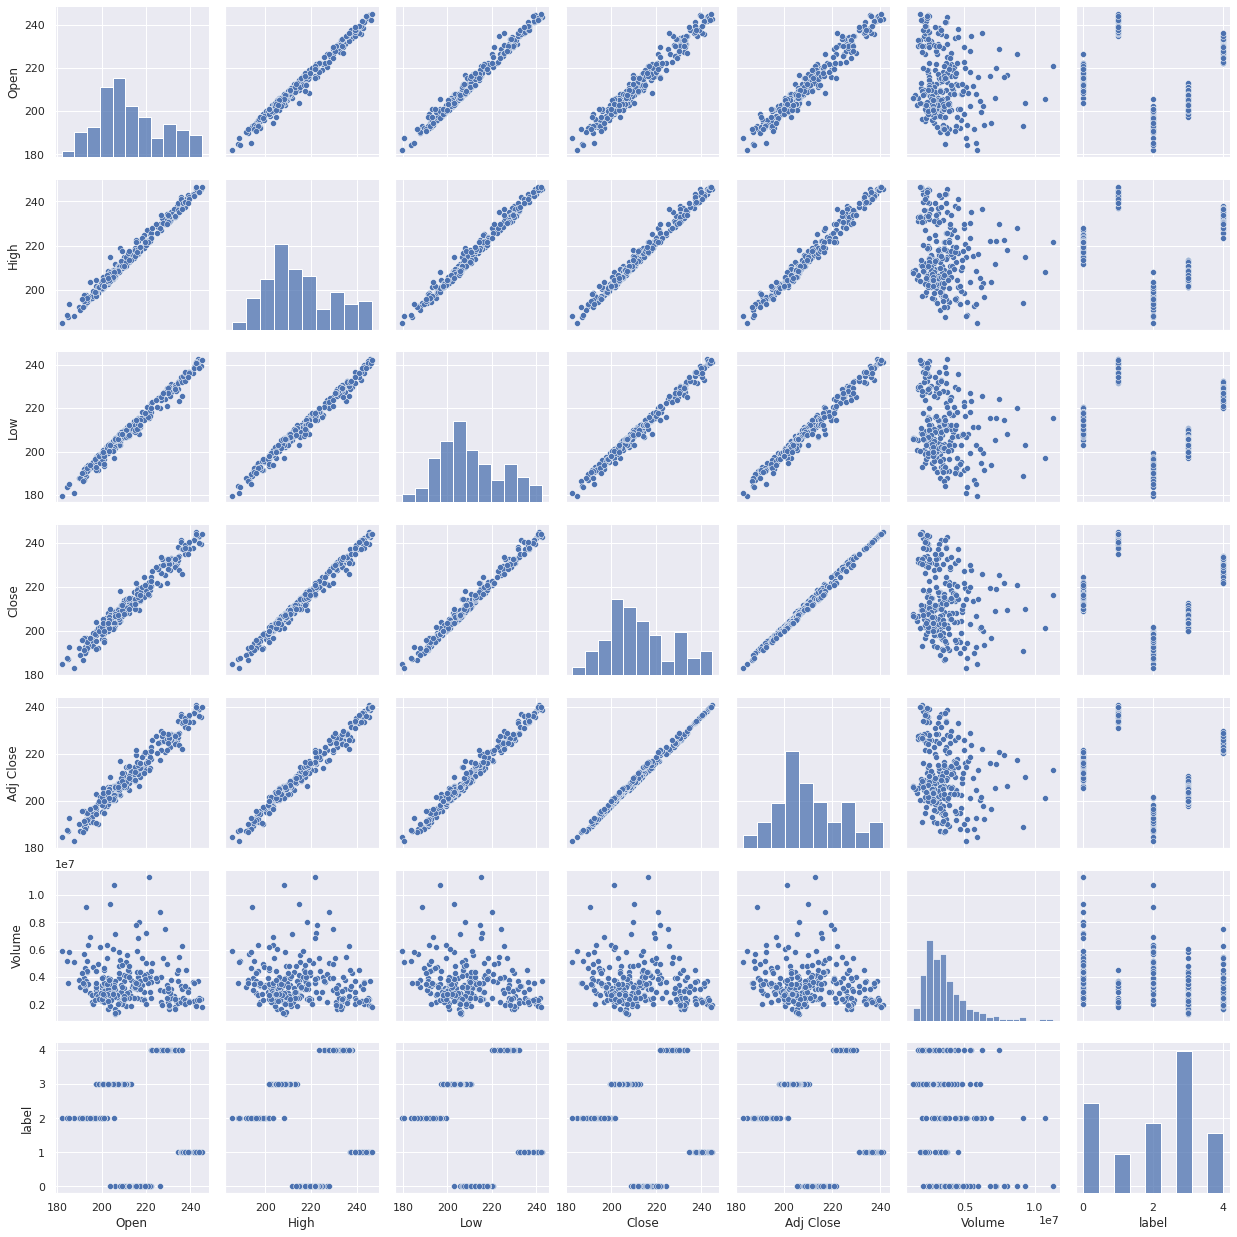

In [29]:
sb.pairplot(df);

###Entrenamiento de datos

In [30]:
X = pd.DataFrame(np.c_[df['Open'], df['Close']], columns = ['Open','Close'])
Y = df['High']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=24)
print("x75%: "+str(X_train.shape) +", x25%: "+str(X_test.shape))
print("y75%: "+str(Y_train.shape) +", y25%: "+str(Y_test.shape))

x75%: (190, 2), x25%: (64, 2)
y75%: (190,), y25%: (64,)


In [38]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

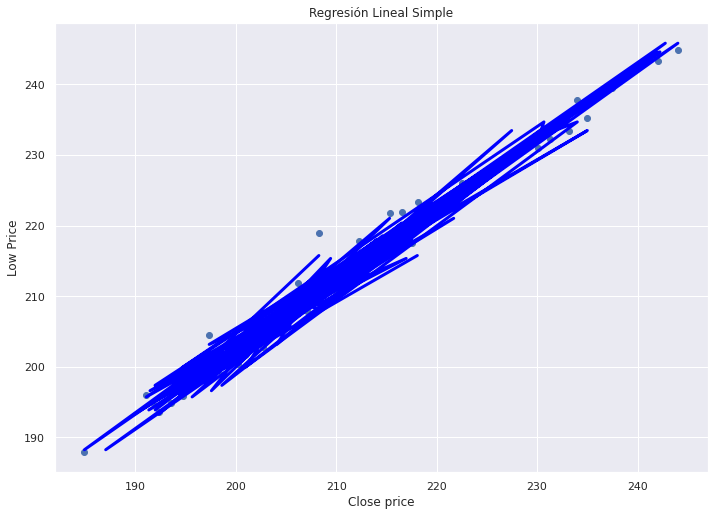


 PRESICIÓN DEL MODELO DE REGRESIÓN LINEAL SIMPLE
0.9933797394691868


In [39]:
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['Open'], Y_test)
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Close price')
plt.ylabel('Low Price')
plt.show()
print('\n PRESICIÓN DEL MODELO DE REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

##Regresión Logistica


In [56]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [61]:
dfelim = df.drop(columns = ['Date'])

In [113]:
x = dfelim.drop('Volume', axis=1)

y = dfelim.label


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=48, test_size=0.25)

In [114]:
x_train.shape

(190, 6)

In [115]:
logistic_regression = LogisticRegression()

In [90]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,label
0,2021-03-18,234.000000,237.779999,229.740005,230.679993,226.064941,4336200,4
1,2021-03-19,228.750000,229.649994,224.050003,225.289993,220.782776,7485100,4
2,2021-03-22,226.619995,227.179993,223.570007,226.020004,221.498154,2211600,4
3,2021-03-23,222.059998,225.240005,216.649994,218.250000,213.883621,4017600,0
4,2021-03-24,220.509995,227.110001,220.509995,221.229996,216.804001,4258000,0


In [63]:
dfelim.head(5)

,Open,High,Low,Close,Adj Close,Volume,label
0,234.000000,237.779999,229.740005,230.679993,226.064941,4336200,4
1,228.750000,229.649994,224.050003,225.289993,220.782776,7485100,4
2,226.619995,227.179993,223.570007,226.020004,221.498154,2211600,4
3,222.059998,225.240005,216.649994,218.250000,213.883621,4017600,0
4,220.509995,227.110001,220.509995,221.229996,216.804001,4258000,0


In [116]:
logistic_regression.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [117]:
y_prediction = logistic_regression.predict(x_test)
print(y_prediction)

[3 4 0 3 3 4 3 0 2 0 2 3 2 3 3 4 3 0 3 4 3 3 0 2 3 4 3 0 2 0 2 3 4 0 0 3 0
 1 3 0 3 3 3 0 2 1 0 1 4 0 3 0 3 3 3 2 2 4 3 2 3 0 2 0]


In [118]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Exactitud= ' + str(100*accuracy) + "%")

Exactitud= 95.3125%


In [119]:
logistic_regression.score(x_test, y_test)

0.953125

##K-means

###Representación gráfica de los datos.  K-means

---


*   Ahora podemos echar un vistazo a la representación gráfica de nuestros datos. En el eje x representaremos el precio de cierre (CLOSE) y en el eje y el volumen (VOLUMEN)
*   VAMOS A representar gráficamente los datos normalizados, pero que, si hubiésemos representado los datos sin normalizar la gráfica sería exactamente igual, con la única diferencia que la escala de los ejes sería diferente.





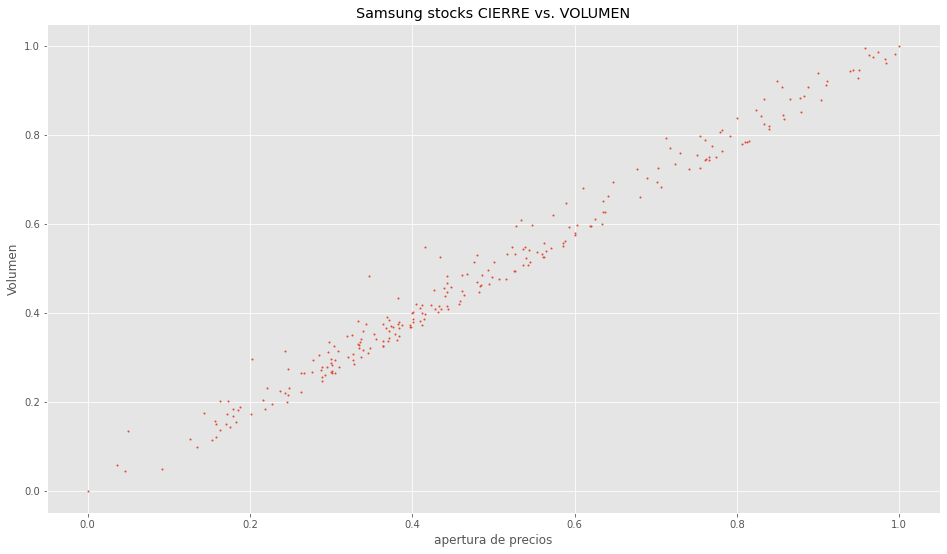

In [12]:
#%% Representación gráfica de los datos.
x = df_escalado['Close'].values
y = df_escalado['Volume'].values
plt.xlabel('apertura de precios')
plt.ylabel('Volumen')
plt.title('Samsung stocks CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=1)

###Aplicación de k-means.

---
El primer paso antes de aplicar k-means es decidir qué valor de k (número de clústeres) queremos usar:


1.    Una forma de elegir este valor k es por criterio propio: si conocemos bien la distribución de nuestros datos y queremos “forzar” un número determinado de clústeres simplemente lo elegimos
2.    realizar una gráfica elbow o de codo para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y la suma de los errores cuadráticos (SSE). De esta forma podemos elegir el valor de k dónde se produce el “codo”   (**----ESTA ME GUSTA MÁS---**)




###Realizar una gráfica elbow o de codo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

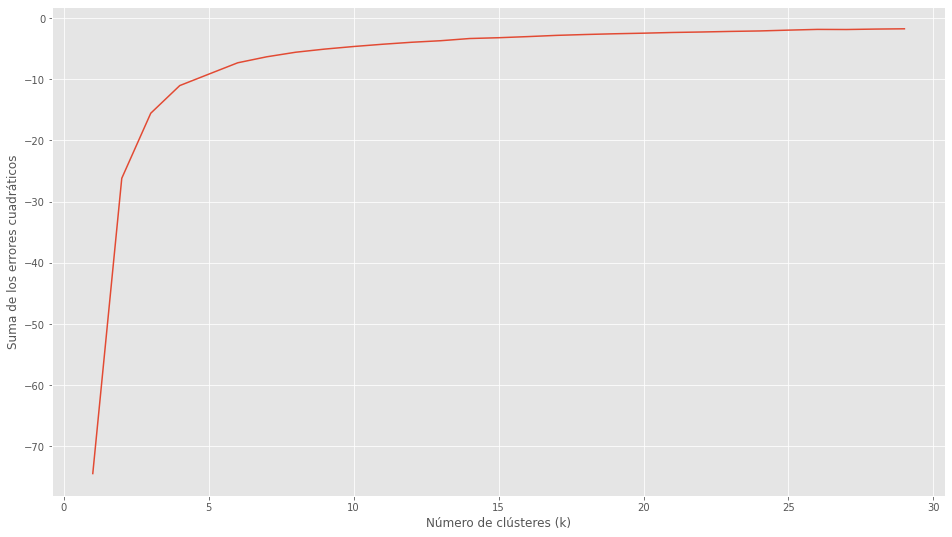

In [13]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

####NOTA: 

---


**No hay una solución, un valor de k, más correcto que otro**, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que **nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución** escogida

###Aplicar el algoritmo de k-mean

In [14]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[0.53788939 0.54343399 0.52840424 0.533219   0.53228298 0.30598929]
 [0.92053264 0.9290003  0.91651626 0.91996139 0.91604168 0.14111738]
 [0.1978451  0.18564423 0.19058115 0.17906348 0.17186154 0.3073433 ]
 [0.36906187 0.35921519 0.37966734 0.36420453 0.36400886 0.16378629]
 [0.75846126 0.7621424  0.75088676 0.75169897 0.73751143 0.19759281]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


###Etiquetado de datos.

---
asignamos cada registro de nuestro dataset a uno de los clústers


In [15]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df.insert(0, 'Date', dates)           #%% Añadimos la columna de fecha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [16]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,label
0,2021-03-18,234.000000,237.779999,229.740005,230.679993,226.064941,4336200,4
1,2021-03-19,228.750000,229.649994,224.050003,225.289993,220.782776,7485100,4
2,2021-03-22,226.619995,227.179993,223.570007,226.020004,221.498154,2211600,4
3,2021-03-23,222.059998,225.240005,216.649994,218.250000,213.883621,4017600,0
4,2021-03-24,220.509995,227.110001,220.509995,221.229996,216.804001,4258000,0
5,2021-03-25,219.229996,224.970001,216.039993,224.250000,219.763580,2901800,0
6,2021-03-26,226.350006,229.839996,225.210007,229.500000,224.908554,3040100,4
7,2021-03-29,228.100006,231.850006,227.710007,230.220001,225.614151,3003200,4
8,2021-03-30,231.199997,234.720001,231.139999,233.080002,228.416931,3139100,4
9,2021-03-31,234.350006,237.009995,228.850006,231.869995,227.231125,4512300,4


###Representación gráfica de los clústeres k-means.

---
Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que hemos usado sólo dos variable


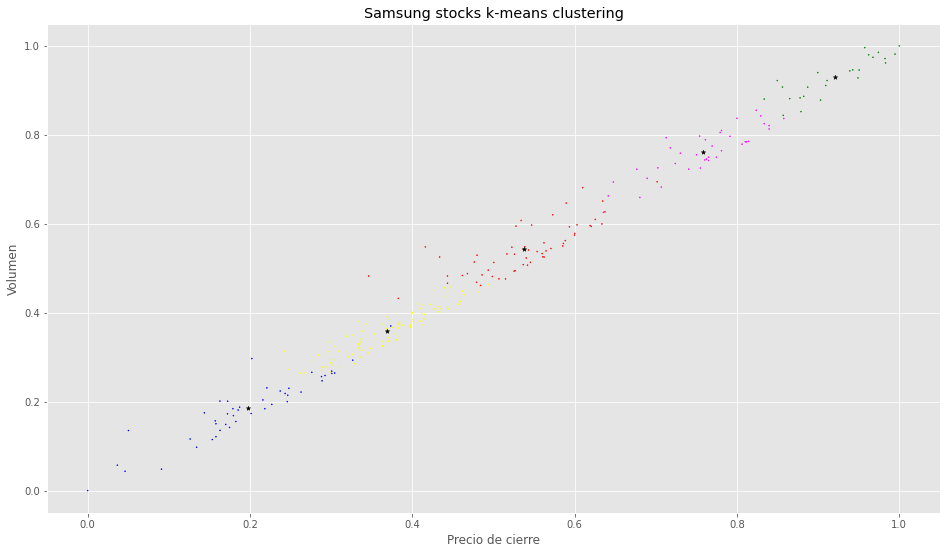

In [17]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('Samsung stocks k-means clustering')
plt.show()

Que podemos inferir???

###Clasificación de nuevas muestras.

---
Supongamos que nuestros nuevos datos a categorizar son los siguientes:


*   CLOSE: 100.000
*   VOLUME: 5.500.000






### Agregando datos de forma clasica (paso a paso)

In [18]:
close = 100000
volume = 5500000

nuevo_dato = pd.DataFrame([[close,volume]]) # Nueva muestra
nuevo_dato = nuevo_dato.rename(columns = {0: 'Close', 1: 'Volume'})

#### Normalizamos los nuevos datos

In [19]:
#agregamos los datos al dataframe original
df_n = df.append(nuevo_dato)

####borramos columnas que no tenemos

---

Nuestro nuevo dataframe df_n tiene aun las columnas “date” y “label” del datafame original, así que las eliminamos y resetamos el índice

In [20]:
df_n = df_n.drop('Date', 1)
df_n = df_n.drop('label', 1)
df_n = df_n.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


####Aplicamos normalización de datos [0 - 1]

In [21]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_n)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [23]:
df_escalado.iloc[-5:]   #ver los ultimos registros

,Close,Volume,2,3,4,5
250,0.540339,0.522794,0.490146,0.000337,0.578362,0.304780
251,0.562213,0.557148,0.518913,0.000333,0.571826,0.306239
252,0.527659,0.594432,0.551017,0.000389,0.668478,0.227934
253,0.593596,0.593129,0.609186,0.000381,0.654892,0.257101
254,NaN,NaN,NaN,1.000000,NaN,0.419054
